### 목표 : 무게에 따른 길이를 예측해주는 모델
- 데이터 : fish.csv
- 피쳐 : 무게
- 라벨/타겟 : 길이
- 

(1) 모듈 로딩 및 데이터 준비

In [90]:
import sklearn
print(sklearn.__version__)

1.3.0


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np

In [66]:
# 데이터 파일
data_file = '../data/fish.csv'

In [67]:
# 데이터 준비
fishDF = pd.read_csv(data_file, usecols=[0,1,2])
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [68]:
# 학습에 사용할 데이터 추출 => Perch 행만 추출
perchDF = fishDF[fishDF.Species == 'Perch']

# 인덱스 정리
perchDF.reset_index(drop=True, inplace=True)
perchDF

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4
5,Perch,100.0,18.0
6,Perch,78.0,18.7
7,Perch,80.0,19.0
8,Perch,85.0,19.6
9,Perch,85.0,20.0


In [69]:
# 추출된 데이터 기본 정보 확인
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [70]:
# 수치 컬럼의 데이터 정보 확인
perchDF.describe()

,Weight,Length
count,56.000000,56.000000
mean,382.239286,27.892857
std,347.617717,9.021668
min,5.900000,8.400000
25%,120.000000,21.825000
50%,207.500000,25.300000
75%,692.500000,36.625000
max,1100.000000,44.000000


(3) 데이터 전처리
- 결측치, 이상치, 중복값 처리
- 데이터 분포, 컬럼 분포, 최빈값, 고유값

(3-1) 데이터 분포

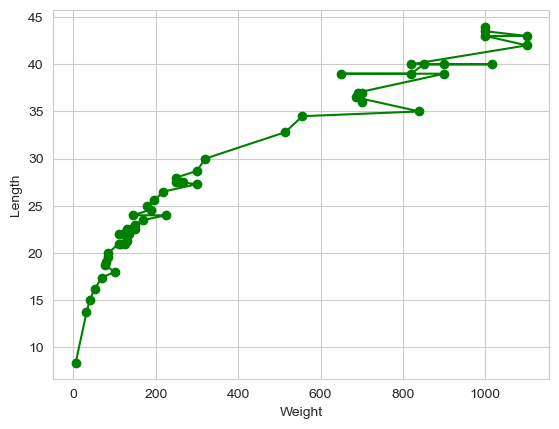

In [71]:
# 무게와 길이에 대한 시각화
plt.plot(perchDF.Weight, perchDF.Length, 'g', marker='o')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

In [72]:
# 무게와 길이에 대한 상관계수
perchDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [73]:
## [분석 결과] 무게에 따른 길이는 비례관계
# 무게 + 연산 ===> 길이
perchDF.iloc[:10]

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4
5,Perch,100.0,18.0
6,Perch,78.0,18.7
7,Perch,80.0,19.0
8,Perch,85.0,19.6
9,Perch,85.0,20.0


In [74]:
model = (perchDF.Weight*1/5)+7
model[:10]

0     8.18
1    13.40
2    15.00
3    17.30
4    21.00
5    27.00
6    22.60
7    23.00
8    24.00
9    24.00
Name: Weight, dtype: float64

In [75]:
(model-perchDF.Length).abs().sum()

3112.12

(4) 학습 진행
- 학습 방법 : 지도학습 + 회귀(예측) => 선형회귀 LinearRegression

In [76]:
# 모델 인스턴스 생성
model = LinearRegression()

In [77]:
# 학습
model.fit(perchDF[['Weight']], perchDF['Length'])

LinearRegression()

In [78]:
# 학습 후 속성 확인
print(f'피쳐에 할당되는 가중치 계수 : {model.coef_}')
print(f'수식에 사용되는 절편 계수  : {model.intercept_}')

피쳐에 할당되는 가중치 계수 : [0.02487985]
수식에 사용되는 절편 계수  : 18.382802913636723


In [79]:
perchDF.Weight * model.coef_ + model.intercept_

0     18.529594
1     19.178958
2     19.377997
3     19.664115
4     20.124392
5     20.870787
6     20.323431
7     20.373191
8     20.497590
9     20.497590
10    21.119586
11    21.243985
12    21.492784
13    21.617183
14    21.368384
15    21.368384
16    21.617183
17    21.741582
18    21.119586
19    21.617183
20    22.114780
21    21.990380
22    22.114780
23    22.612377
24    23.980768
25    21.990380
26    23.060214
27    22.861175
28    23.284132
29    23.806609
30    25.846756
31    24.851563
32    24.975962
33    24.602764
34    24.602764
35    25.846756
36    26.344353
37    31.171043
38    32.215997
39    39.281873
40    35.425497
41    35.798695
42    35.798695
43    35.549896
44    40.774664
45    34.554702
46    38.784276
47    39.530671
48    40.774664
49    43.635846
50    38.784276
51    45.750633
52    43.262648
53    45.750633
54    43.262648
55    43.262648
Name: Weight, dtype: float64

(5) 테스트

In [80]:
model.score(perchDF[['Weight']], perchDF.Length)

0.919021073244782

In [81]:
# 결정계수 R2 즉, 얼마나 정답에 가깝게 근사하게 결과를 예측해내는지를 나타내는 계수값
# 범위 : 0.0 ~ 1.0
# 1.0에 가까울수록 잘 만들어진 모델
model.score(perchDF[['Weight']], perchDF.Length)

0.919021073244782

In [82]:
y_pre = model.predict(perchDF[['Weight']])
np.round(y_pre, 1)

array([18.5, 19.2, 19.4, 19.7, 20.1, 20.9, 20.3, 20.4, 20.5, 20.5, 21.1,
       21.2, 21.5, 21.6, 21.4, 21.4, 21.6, 21.7, 21.1, 21.6, 22.1, 22. ,
       22.1, 22.6, 24. , 22. , 23.1, 22.9, 23.3, 23.8, 25.8, 24.9, 25. ,
       24.6, 24.6, 25.8, 26.3, 31.2, 32.2, 39.3, 35.4, 35.8, 35.8, 35.5,
       40.8, 34.6, 38.8, 39.5, 40.8, 43.6, 38.8, 45.8, 43.3, 45.8, 43.3,
       43.3])

In [83]:
# 오차 계산 => 예측값 - 정답
errorSr = y_pre - perchDF.Length
errorSr

0     10.129594
1      5.478958
2      4.377997
3      3.464115
4      2.724392
5      2.870787
6      1.623431
7      1.373191
8      0.897590
9      0.497590
10     0.119586
11     0.243985
12     0.492784
13     0.317183
14    -0.631616
15    -0.631616
16    -0.382817
17    -0.258418
18    -0.880414
19    -0.882817
20    -0.385220
21    -0.709620
22    -0.885220
23    -0.887623
24    -0.019232
25    -2.009620
26    -1.539786
27    -2.138825
28    -2.315868
29    -2.693391
30    -1.453244
31    -2.648437
32    -2.524038
33    -2.897236
34    -3.397236
35    -2.853244
36    -3.655647
37    -1.628957
38    -2.284003
39     4.281873
40    -1.074503
41    -0.201305
42    -1.201305
43    -1.450104
44     1.774664
45    -4.445298
46    -0.215724
47    -0.469329
48     0.774664
49     3.635846
50    -1.215724
51     3.750633
52     0.262648
53     2.750633
54    -0.237352
55    -0.737352
Name: Length, dtype: float64

In [84]:
(errorSr**2).sum()/errorSr.shape[0]

6.473219904872075

In [85]:
# 정답과 완벽하게 똑같은 갯수 찾기
errorSr[(y_pre - perchDF.Length)==0]

Series([], Name: Length, dtype: float64)

(6) 성능평가
- 결정계수 값 : 1.0애 가까울 수록 좋음
- 오차평균 값 : 낮을 수록 좋음
- 활용 모듈 : sklearn.merics

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [87]:
# 결정 계수 값
r2_score(perchDF.Length, y_pre)

0.919021073244782

In [88]:
# 평균제곱오차
mean_squared_error(perchDF.Length, y_pre)

6.473219904872075

In [92]:
# 루트평균제곱오차
mean_squared_error(perchDF.Length, y_pre, squared=False)

2.5442523272804674

In [93]:
mean_squared_error(perchDF.Length, y_pre)**(1/2)

2.5442523272804674

In [89]:
# 평균절대값오차
mean_absolute_error(perchDF.Length, y_pre)

1.851505000314426